# Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

names = []
for i in range(1,66):
    names.append('X'+str(i))
    
year_1 = pd.read_csv('./data/1year.csv', low_memory=False, names=names)
year_2 = pd.read_csv('./data/2year.csv', low_memory=False, names=names)
year_3 = pd.read_csv('./data/3year.csv', low_memory=False, names=names)
year_4 = pd.read_csv('./data/4year.csv', low_memory=False, names=names)
year_5 = pd.read_csv('./data/5year.csv', low_memory=False, names=names)

print(year_1.shape, year_2.shape, year_3.shape, year_4.shape, year_5.shape)

((7027, 65), (10173, 65), (10503, 65), (9792, 65), (5910, 65))


Notice that the number of columns in each dataframe is same(65), hence, we can combine all the dataset to a large single dataset.
Also, we drop the duplicates in the datasets.

In [2]:
datasets = [year_1, year_2, year_3, year_4, year_5]
dataframe = pd.concat(datasets, axis=0).drop_duplicates().reset_index(drop=True)
dataframe.shape

(43004, 65)

In [3]:
dataframe.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


# Handling Missing Values


Seperating the numerical and categorical data.

In [4]:
dataframe._get_numeric_data

<bound method DataFrame._get_numeric_data of               X1        X2         X3       X4        X5         X6  \
0        0.20055   0.37951    0.39641   2.0472    32.351    0.38825   
1        0.20912   0.49988    0.47225   1.9447    14.786          0   
2        0.24866   0.69592    0.26713   1.5548   -1.1523          0   
3       0.081483   0.30734    0.45879   2.4928    51.952    0.14988   
4        0.18732   0.61323     0.2296   1.4063   -7.3128    0.18732   
5        0.22822   0.49794    0.35969   1.7502   -47.717          0   
6        0.11109   0.64744    0.28971   1.4705    2.5349          0   
7        0.53232  0.027059    0.70554   53.954    299.58          0   
8        0.00902   0.63202   0.053735   1.1263   -37.842          0   
9        0.12408   0.83837    0.14204   1.1694   -91.883          0   
10       0.24001   0.44355    0.18835     1.44   -21.165    -0.9319   
11     -0.027117   0.11148    0.11989   2.0754   -31.643  -0.084883   
12       0.26669   0.34994    0.

Notice the number of rows and columns in the result.It has 65 columns.
Hence, there are no categorical data and only numerical features.

In [5]:
from sklearn.preprocessing import Imputer

# replacing '?' with NaN
dataframe = dataframe.replace('?', np.NaN)
print(dataframe.isnull().values.any())

# imputing NaN with median
imp_mean = Imputer(missing_values=np.NaN, strategy='median', axis=1)
imputed_dataframe = pd.DataFrame(imp_mean.fit_transform(dataframe))
imputed_dataframe.columns = dataframe.columns 
imputed_dataframe.index = dataframe.index

print(imputed_dataframe.isnull().values.any())
imputed_dataframe.shape

True
False


(43004, 65)

# EDA

The columns _X1,X2,X3,X4,X48,X49_ seem to be important as they represent the following :
* net profit / total assets 
* total liabilities / total assets 
* working capital / total assets
* current assets / short-term liabilities
* (profit on operating activities - depreciation) / total assets 
* (profit on operating activities - depreciation) / sales 

Except for _X55_ and _X62_, all the other features have values in a range.

### BOXPLOTS

In [6]:
columns = ['X1','X2','X3','X4','X48','X49','X53','X62']
for i in columns:
    print(imputed_dataframe[i].max(), imputed_dataframe[i].min())

(94.280000000000001, -463.88999999999999)
(480.95999999999998, -430.87)
(28.335999999999999, -479.95999999999998)
(53433.0, -0.40311000000000002)
(623.85000000000002, -542.55999999999995)
(178.88999999999999, -9001.0)
(180440.0, -3828.9000000000001)
(25016000.0, -2336500.0)


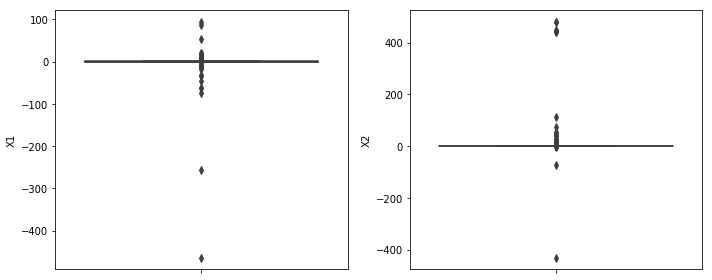

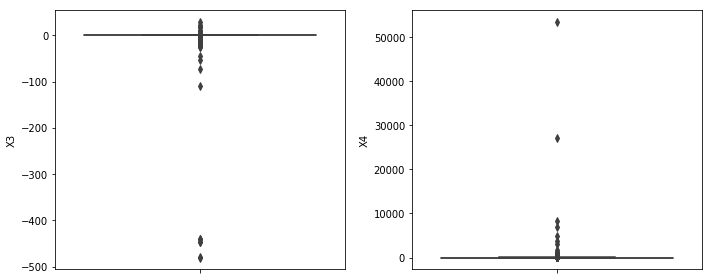

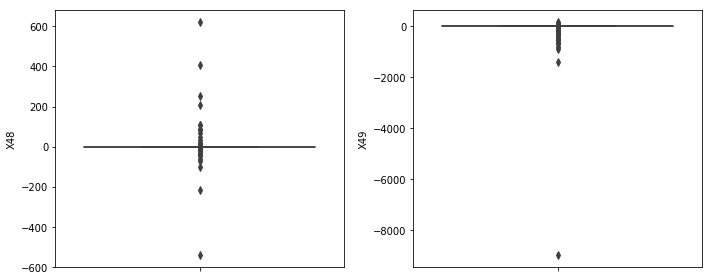

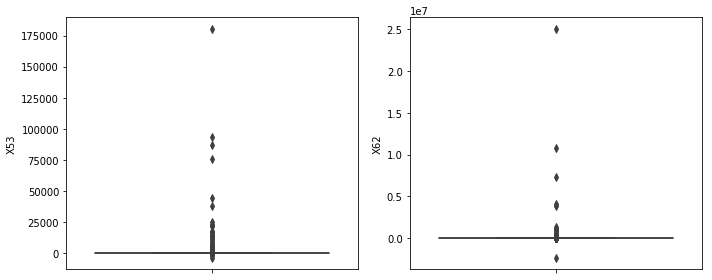

In [7]:
facet = None
for i in range(0,len(columns),2):
    if len(columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, columns[i],data = imputed_dataframe)
        plt.subplot(122)            
        sns.boxplot(facet, columns[i+1],data = imputed_dataframe)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = imputed_dataframe)

In [8]:
# Removing the outliers

# imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X1']<-400)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X2']>400)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X3']<-300)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X4']>50000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X48']>600) | (imputed_dataframe['X48']<-600)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X49']<-8000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X53']>50000)].index)
imputed_dataframe = imputed_dataframe.drop(imputed_dataframe[(imputed_dataframe['X62']>2016000.0) | (imputed_dataframe['X48']<-1536500.0)].index)
imputed_dataframe.shape

(42987, 65)

### HEATMAP

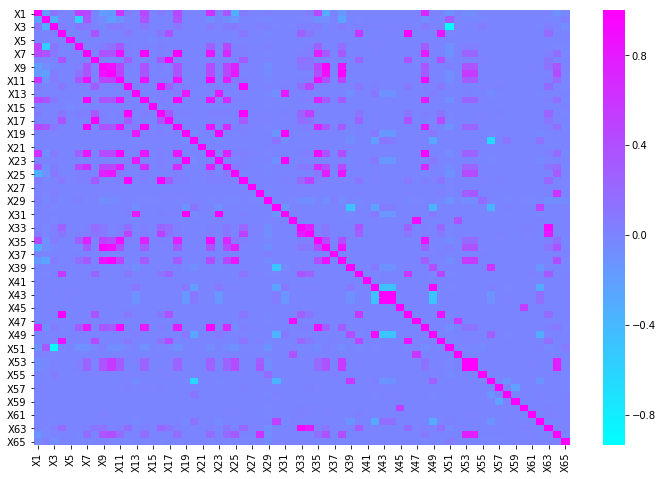

(42987, 65)

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(imputed_dataframe.corr(), cmap='cool')
plt.show()
imputed_dataframe.shape

There are too many **DARK PINK** patches showing highly positive correlation.
Similarily, there are many **LIGHT BLUISH** patches indicating higly negative correlatioin.

It is very much required to remove these highly correlated data.

In [10]:
# for i in imputed_dataframe.columns:
#     imputed_dataframe[i] = np.sqrt(imputed_dataframe[i])
# plt.figure(figsize=(12,8))
# sns.heatmap(imputed_dataframe.corr(), cmap='cool')
# plt.show()

Standardization is necessary as some columns are in % and some are in $, whereas some are in years.

# Feature Engineering

###  Interaction Features

The capital of a business which is used in its day-to-day trading operations, calculated as the current assets minus the current liabilities.
* X55 : working capital
* X4 : current assets

So, a new feature **current liabilities** can be added.  

#### X10 and X25 can be combined to get a new feature share capital/total assets.

In [15]:
imputed_dataframe.loc[:,'X66'] = pd.Series(imputed_dataframe['X10'] - imputed_dataframe['X25'], 
                                           index=imputed_dataframe.index)
imputed_dataframe.shape

(42987, 66)

### Indicator Variables

# Feature Selection
